In [131]:
import numpy as np

In [132]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from numpy import genfromtxt
from scipy.spatial.distance import cdist
import seaborn as sns

In [133]:
data = pd.read_csv('./4801.txt',names=['grid_id', 'v_mean','v_std','v_support', 'd_mean', 'd_std', 'd_support'])
data2 = pd.read_csv('./4801_2.txt',names=['v_mean','d_mean'])


In [134]:
data2.head(5)


,v_mean,d_mean
0,5.090986,74.054604
1,0.937808,114.299090
2,1.255962,163.636364
3,3.026957,173.358737
4,3.722640,179.120259


In [93]:
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)
numpy_data = df2.as_matrix()
df2.head(5)

,v_mean,d_mean
0,5.090986,74.054604
1,0.937808,114.299090
2,1.255962,163.636364
3,3.026957,173.358737
4,3.722640,179.120259


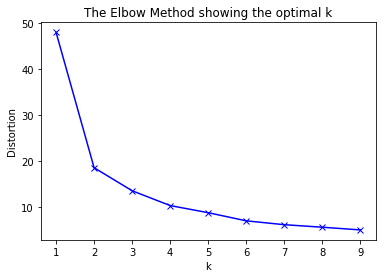

In [94]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(numpy_data)
    kmeanModel.fit(numpy_data)
    distortions.append(sum(np.min(cdist(numpy_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / numpy_data.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(numpy_data)

In [127]:
n_clusters = 3

In [128]:
km = KMeans(n_clusters=n_clusters).fit(numpy_data)
labels = km.predict(numpy_data)
centroids = kmeans.cluster_centers_
C = kmeans.cluster_centers_

df2['cluster_id'] = km.labels_

In [130]:
km2 = KMeans(init="k-means++", n_clusters=10, random_state=42)
clusters = km2.fit_predict(C)

ValueError: n_samples=4 should be >= n_clusters=10

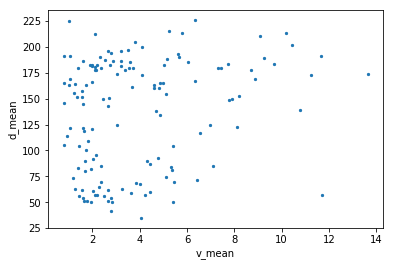

In [114]:
df.plot.scatter(x='v_mean',y='d_mean',marker='.')

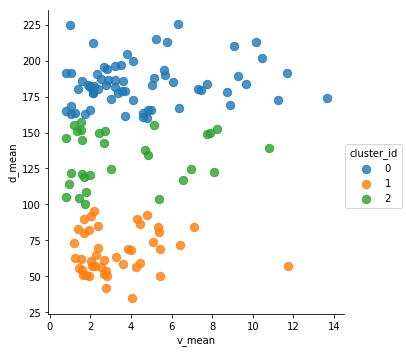

In [135]:
sns.lmplot('v_mean','d_mean', data=df2, fit_reg=False, scatter_kws={"s": 70}, hue="cluster_id")


In [111]:
df2

,v_mean,d_mean,cluster_id
0,5.090986,74.054604,1
1,0.937808,114.299090,1
2,1.255962,163.636364,0
3,3.026957,173.358737,0
4,3.722640,179.120259,0
5,2.445269,149.908749,0
6,1.988112,120.617798,1
7,5.020296,182.782009,0
8,3.502902,197.292511,0
9,3.197118,181.963290,0
